In [176]:
import json

with open('./result_json/commonsense_qa_results.json', 'r') as f:
    data = json.load(f)

In [177]:
from collections import Counter
for d in data:
    if d['selection']=='similar' and d['n_shot']==8:
        similar = d
        break
print(d['accuracy'])
majority_demon_label_ratio = 0
prediction_unfollowing_majority= 0
answer_mismatch_majority=0
for res in similar['results'].values():
    c=Counter(res['demonstration_label'])
    most_label, most_value = c.most_common()[0]
    majority_demon_label_ratio+=(most_value/(similar['n_shot']))
    if most_label!=res['answer']:
        answer_mismatch_majority+=1
    if most_label!=res['prediction']:
        prediction_unfollowing_majority+=1
majority_demon_label_ratio = majority_demon_label_ratio/similar['train_dev_size'][1]
answer_mismatch_majority = answer_mismatch_majority/similar['train_dev_size'][1]
prediction_unfollowing_majority = prediction_unfollowing_majority/similar['train_dev_size'][1]
    

0.57


In [178]:
print(majority_demon_label_ratio)

0.39375


In [179]:
prediction_unfollowing_majority

0.75

In [180]:
answer_mismatch_majority

0.82

In [1]:
import json
with open('./result_entail_json/mrpc_results.json', 'r') as f:
    r_data = json.load(f)

In [2]:
acc = []
for d in r_data:
    if d['n_shot']==8 and d['selection']=="random_stratify_sampling":
        acc.append(d['accuracy'])

In [3]:
import numpy as np
print(np.mean(np.array(acc)))
print(np.std(np.array(acc)))


0.677218
0.040129623671298006


In [4]:
acc

[0.71768, 0.70841, 0.65391, 0.69623, 0.60986]

In [281]:
with open("./agnews_cosine_scores.json", 'r') as f:
    cs = json.load(f)

Text(0.5, 0, 'cosine similarity')

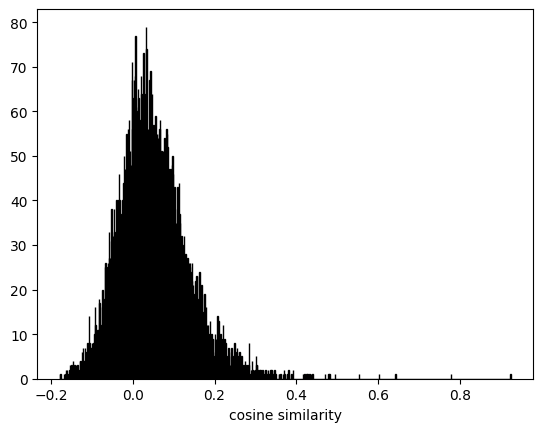

In [282]:
import matplotlib.pyplot as plt

plt.hist(cs[4], color="lightgreen", ec = "black", bins=1000)
plt.xlabel('cosine similarity')

In [283]:
cs2 = np.array(cs)

In [284]:
np.mean(np.mean(cs2, axis=-1))

0.05786586149103551

In [285]:
np.max(cs2.flatten())

0.9885063171386719

In [286]:
np.min(cs2.flatten())

-0.21990373730659485

In [1]:
from datasets import load_dataset

cb = load_dataset('aps/super_glue', 'cb')

/home/donggunseo/.local/lib/python3.8/site-packages/datasets/load.py:1461: FutureWarning: The repository for aps/super_glue contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/aps/super_glue
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Generating test split: 100%|██████████| 250/250 [00:00<00:00, 11284.23 examples/s]


In [2]:
cb

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'idx', 'label'],
        num_rows: 250
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'idx', 'label'],
        num_rows: 56
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'idx', 'label'],
        num_rows: 250
    })
})

In [9]:
cb['validation'][2]

{'premise': "``But my father always taught me never to be afraid of pointing out the obvious. I'm sure you have noticed the implication of the letter, that the writer has in fact observed Jenny undressing for bed?'' I just wondered if you also knew as I'm sure you do that her bedroom's at the rear of the house?",
 'hypothesis': "Jenny's bedroom's at the rear of the house",
 'idx': 2,
 'label': 0}

In [10]:
import numpy as np


a = np.ndarray((4,10))
b = np.ndarray((4,10))
c = np.ndarray((4,10))



In [11]:
a

array([[1.17537427e-316, 0.00000000e+000, 1.45255300e-321,
                    nan, 2.49294647e-306, 5.83800650e-302,
        4.96980449e-297, 3.38520870e-306, 1.37977062e-281,
        3.40981413e-291],
       [4.96980384e-297, 4.22884902e-307, 6.54809821e+281,
        1.63403729e-301, 1.34065087e-272, 3.88367945e-267,
        7.02093488e-292, 2.49468480e-306, 5.83316465e-302,
        1.69113662e-258],
       [8.78713400e-268, 1.69416747e-258, 4.96066471e-239,
        7.27534515e-249, 3.06077957e-308, 1.70545218e-253,
        9.54080901e-278, 1.69416747e-258, 5.75608913e-263,
        1.63722716e-301],
       [2.10053204e-301, 7.27534900e-249, 8.78372380e-268,
        1.97983711e-277, 5.11767330e-307, 1.76124880e-258,
        1.39069391e-309, 5.57006249e-307, 2.49954128e-306,
        9.53640534e-292]])

In [12]:
b

array([[ 6.07041463e-317,  0.00000000e+000,  6.90784745e-310,
         6.90784745e-310,  9.41755664e+295,  6.90784745e-310,
         6.90784745e-310, -5.18877864e-198,  6.90798125e-310,
         6.90784745e-310],
       [ 1.01039194e-035,  6.90784745e-310,  6.90784745e-310,
         2.21824601e+176,  6.90798125e-310,  6.90784745e-310,
        -7.60879292e+208,  6.90784745e-310,  6.90784745e-310,
        -4.69603712e-206],
       [ 6.90798125e-310,  6.90784745e-310,  5.82807241e-292,
         6.90798125e-310,  6.90784752e-310, -1.27450352e+123,
         6.90784745e-310,  6.90784745e-310,  3.51433722e-059,
         6.90798125e-310],
       [ 6.90784745e-310,  4.00193173e-322,  1.17682168e-316,
         6.90798420e-310,  6.90798366e-310,  6.90798155e-310,
         6.90798363e-310,  6.90798365e-310,  6.90798172e-310,
         6.90798361e-310]])

In [13]:
c

array([[6.0608574e-317, 0.0000000e+000, 6.9079650e-310, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000],
       [0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000],
       [0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000],
       [0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000]])

In [16]:
np.max(np.array([a,b,c]), axis = 0)

array([[1.17537427e-316, 0.00000000e+000, 6.90796500e-310,
                    nan, 9.41755664e+295, 5.83800650e-302,
        4.96980449e-297, 3.38520870e-306, 1.37977062e-281,
        3.40981413e-291],
       [1.01039194e-035, 4.22884902e-307, 6.54809821e+281,
        2.21824601e+176, 1.34065087e-272, 3.88367945e-267,
        7.02093488e-292, 2.49468480e-306, 5.83316465e-302,
        1.69113662e-258],
       [8.78713400e-268, 1.69416747e-258, 4.96066471e-239,
        7.27534515e-249, 3.06077957e-308, 1.70545218e-253,
        9.54080901e-278, 1.69416747e-258, 3.51433722e-059,
        1.63722716e-301],
       [2.10053204e-301, 7.27534900e-249, 8.78372380e-268,
        1.97983711e-277, 5.11767330e-307, 1.76124880e-258,
        1.39069391e-309, 5.57006249e-307, 2.49954128e-306,
        9.53640534e-292]])

In [26]:
from datasets import load_dataset

ds = load_dataset('medical_questions_pairs') ['train']

leng = []
for d in ds:
    leng.append(abs(len(d['question_1'])-len(d['question_2'])))
print(sum(leng)/len(leng))


47.465879265091864


In [27]:
leng

[33,
 50,
 41,
 10,
 28,
 48,
 57,
 127,
 35,
 73,
 42,
 60,
 72,
 38,
 2,
 59,
 11,
 90,
 38,
 56,
 59,
 76,
 5,
 22,
 17,
 100,
 7,
 5,
 54,
 36,
 10,
 18,
 33,
 102,
 151,
 38,
 23,
 159,
 13,
 57,
 0,
 14,
 79,
 25,
 14,
 1,
 90,
 58,
 55,
 37,
 41,
 35,
 18,
 26,
 104,
 36,
 19,
 47,
 14,
 16,
 19,
 33,
 87,
 29,
 38,
 98,
 103,
 14,
 44,
 48,
 110,
 38,
 117,
 17,
 54,
 13,
 132,
 10,
 32,
 55,
 55,
 62,
 23,
 54,
 29,
 64,
 36,
 112,
 28,
 181,
 11,
 8,
 113,
 65,
 54,
 9,
 56,
 6,
 55,
 54,
 93,
 29,
 11,
 18,
 6,
 19,
 3,
 21,
 0,
 86,
 70,
 15,
 54,
 12,
 23,
 42,
 56,
 56,
 22,
 9,
 2,
 36,
 30,
 5,
 9,
 72,
 110,
 50,
 93,
 8,
 22,
 40,
 28,
 24,
 55,
 18,
 70,
 71,
 5,
 13,
 52,
 8,
 70,
 51,
 79,
 39,
 6,
 61,
 63,
 49,
 82,
 118,
 40,
 25,
 10,
 16,
 66,
 70,
 14,
 21,
 9,
 42,
 49,
 16,
 7,
 45,
 86,
 36,
 5,
 65,
 9,
 4,
 62,
 39,
 48,
 19,
 69,
 32,
 43,
 12,
 38,
 0,
 63,
 10,
 52,
 13,
 83,
 68,
 16,
 71,
 3,
 24,
 43,
 35,
 51,
 62,
 40,
 57,
 30,
 57,
 47,
 104,
 

In [1]:
import torch
x = torch.tensor([1.0,2.0,3.0,4.0], device=0)

In [2]:
x.to(1)

tensor([1., 2., 3., 4.], device='cuda:1')

In [3]:
x.to(2)

tensor([1., 2., 3., 4.], device='cuda:2')

In [4]:
x.to(3)

tensor([1., 2., 3., 4.], device='cuda:3')

In [1]:


from transformers import AutoModelForSeq2SeqLM

llama = AutoModelForSeq2SeqLM.from_pretrained('google/flan-t5-base')